#Robert Swain 

In [ ]:
eligible_population = [0.26, 0.74]

In [11]:
import numpy as np
import numpy.random as npr
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
npr.binomial(100, 0.26)

22

In [4]:
simulations = 1000
for i in np.arange(simulations):
    count_pop_black = npr.binomial(100, 0.26, simulations)

In [8]:
count_pop_black[1:5]

array([22, 30, 27, 32])

In [6]:
%matplotlib inline
import pandas as pd
panel_df = pd.DataFrame(count_pop_black)
panel_df.head(3)

,0
0,36
1,22
2,30


#Jury selection in Alameda County

In [13]:
jury =pd.DataFrame({'Ethnicity':['Asian', 'Black', 'Latino', 'White', 'Other'],
    'Eligible':[0.15, 0.18, 0.12, 0.54, 0.01],
    'Panels':[0.26, 0.08, 0.08, 0.54, 0.04]
    })
jury

,Ethnicity,Eligible,Panels
0,Asian,0.15,0.26
1,Black,0.18,0.08
2,Latino,0.12,0.08
3,White,0.54,0.54
4,Other,0.01,0.04


In [14]:
jury = jury.set_index('Ethnicity')

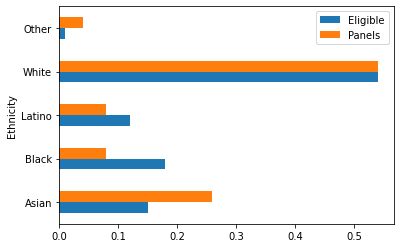

In [17]:
jury.plot.barh()

In [25]:
# Augment the table with a column of differences between proportions
diff = jury['Panels']-jury['Eligible']
jury['Difference'] = abs(diff.values)
jury
#we have to take the absolute value of the difference because the sum of all the postive and negative values would make a 0

,Eligible,Panels,Difference
Ethnicity,,,
Asian,0.15,0.26,0.11
Black,0.18,0.08,0.10
Latino,0.12,0.08,0.04
White,0.54,0.54,0.00
Other,0.01,0.04,0.03


In [26]:
jury['Difference'].sum()/2

0.14

#TVD 
Total variation distance 

In [28]:
test_static = jury['Difference'].sum()/2

##Sampling

In [29]:
panel_size = 1453

In [30]:
npr.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])

array([227, 268, 158, 785,  15])

In [33]:
jury1 = pd.DataFrame(jury,columns=['Eligible','Panels'])
jury1

,Eligible,Panels
Ethnicity,,
Asian,0.15,0.26
Black,0.18,0.08
Latino,0.12,0.08
White,0.54,0.54
Other,0.01,0.04


In [35]:
jury1['Random_sample'] = npr.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
jury1

,Eligible,Panels,Random_sample
Ethnicity,,,
Asian,0.15,0.26,0.130764
Black,0.18,0.08,0.183758
Latino,0.12,0.08,0.128011
White,0.54,0.54,0.547144
Other,0.01,0.04,0.010323


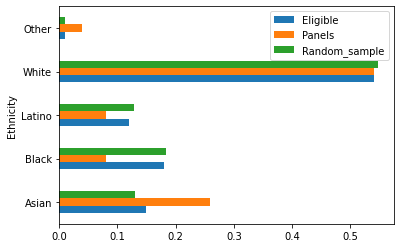

In [36]:
jury1.plot.barh()


In [37]:
tvd = (abs(jury1['Eligible']-jury1['Random_sample'])).sum()/2
tvd

0.0192360633172746

In [41]:
def total_variation_distance(distribution_1, distribution_2):
    return np.abs(distribution_1 - distribution_2).sum()/2
def table_tvd(table, label, other): 
    return total_variation_distance(table[label], table[other])

repetitions = 50

tvds=[]

for i in np.arange(repetitions):

    jury1['Random_sample'] = npr.multinomial(1453,[0.15,0.18,0.12,0.54,0.01])/1453
    tvds.append(table_tvd(jury1, 'Eligible', 'Random_sample'))


tvds

[0.02419132828630423,
 0.016620784583620134,
 0.028795595320027522,
 0.03155540261527871,
 0.029201651754989646,
 0.023613214039917375,
 0.019745354439091544,
 0.00997247075017204,
 0.015244322092223032,
 0.016077081899518238,
 0.02625602202339992,
 0.012071576049552613,
 0.014879559532002803,
 0.024301445285615945,
 0.015251204404680002,
 0.01879559532002751,
 0.030984170681348903,
 0.011995870612525796,
 0.007219545767377792,
 0.01725395732966273,
 0.023007570543702678,
 0.015898141775636632,
 0.017240192704748823,
 0.014094975911906385,
 0.020068823124569875,
 0.0214039917412251,
 0.009298004129387463,
 0.011369580178940138,
 0.01194769442532688,
 0.016620784583620145,
 0.02419132828630425,
 0.007494838265657227,
 0.014115622849277375,
 0.01593255333792154,
 0.01764624913971093,
 0.031073640743289742,
 0.013867859600825889,
 0.01231933929800409,
 0.005767377838953868,
 0.014384033035099782,
 0.03224363386097725,
 0.020715760495526512,
 0.017157604955264992,
 0.010309704060564353,
 0

In [42]:
tvd_final_df = pd.DataFrame(tvds)
tvd_final_df.rename(columns={0:'TVD'},inplace=True)
tvd_final_df.head()

,TVD
0,0.024191
1,0.016621
2,0.028796
3,0.031555
4,0.029202


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7b02cf1e10>]],
      dtype=object)

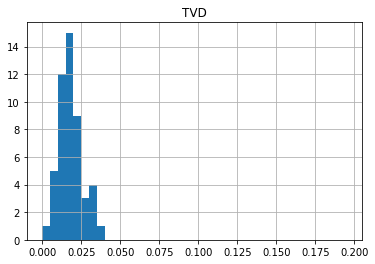

In [43]:
tvd_final_df.hist(bins=np.arange(0, 0.2, 0.005))